In [4]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [5]:
import matplotlib.patches
from matplotlib.collections import PatchCollection
def get_angle_plot(angle, offset = 0.5, color = None, origin = [0,0], len_x_axis = 1, len_y_axis = 1):

    # angle = angle / 180 * np.pi

    if color is None:
        color = 'k' 
    
    arc = matplotlib.patches.Arc(xy=origin,
                                 width=len_x_axis*offset, 
                                 height=len_y_axis*offset,
                                 angle=0,
                                 theta1=0,
                                 theta2=angle,
                                 alpha=1,
                                 color=color,
                                 label=str(angle)+u"\u00b0")
                                 
    p = PatchCollection([arc], alpha=0.4)
    p.set_array(np.array('k'))

    return p


In [6]:
def add_angle(ax,
              angle,
              offset =[0.5],
              color = None,
              origin = [0,0],
              len_x_axis = 1,
              len_y_axis = 1,
              up_angle_annot=True,
              projections=True,
              projection_annotation=True,
              dot_annotation=True):

    # angle = angle / 180 * np.pi

    if color is None:
        color = 'k' 


    if up_angle_annot:
        for os in offset:
            arc = matplotlib.patches.Arc(xy=origin,
                                    width=len_x_axis*os, 
                                    height=len_y_axis*os,
                                    angle=0,
                                    theta1=0,
                                    theta2=angle,
                                    alpha=1,
                                    color=color)
            ax.add_patch(arc)
    else:
        for os in offset:
            arc = matplotlib.patches.Arc(xy=origin,
                                    width=len_x_axis*os, 
                                    height=len_y_axis*os,
                                    angle=0,
                                    theta1=-abs(angle),
                                    theta2=0,
                                    alpha=1,
                                    color=color)
            ax.add_patch(arc)

    angle_rad = angle / 180 * np.pi
    ax.text(x=len_x_axis*offset[-1]*.5*np.cos(angle_rad / 2),
            y=len_x_axis*offset[-1]*.5*np.sin(angle_rad / 2),
            s=str(angle)+u"\u00b0",
            color=color,
            size=16)

    ax.plot([0, np.cos(angle_rad)], [0, np.sin(angle_rad)], c=color, lw=1)

    if dot_annotation:
        ax.text(x=np.cos(angle_rad) + 0.05,
                y=np.sin(angle_rad)+0.05,
                s=r'$\left(\cos({angle}^\circ), \sin({angle}^\circ)\right)$'.format(angle=angle),
                size=12,
                color=color)


    if projections:
        ax.plot([np.cos(angle_rad), np.cos(angle_rad)], [0, np.sin(angle_rad)], c=color, lw=0.7, ls='--')
        ax.plot([0, np.cos(angle_rad)], [np.sin(angle_rad), np.sin(angle_rad)], c=color, lw=0.7, ls='--')
        if projection_annotation:
            ax.text(x=np.cos(angle_rad),
                    y=-0.08,
                    s=f'$x$',
                    size=12,
                    color=color)
            ax.text(x=-0.08,
                    y=np.sin(angle_rad),
                    s=f'$y$',
                    size=12,
                    color=color)



                                

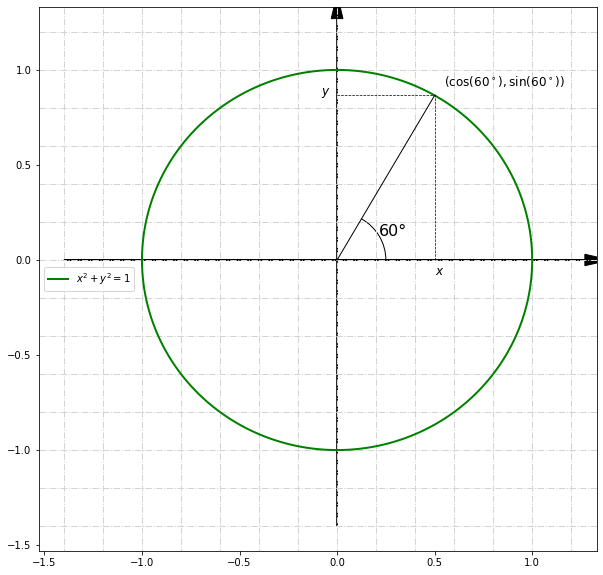

In [8]:
k = 1.4
ymin, ymax = -k, k
xticks = np.arange(-k, k, 0.2)
yticks = np.arange(-k, k, 0.2)

fig = plt.figure(figsize=(10, 10))
ax = fig.gca()

for xt in xticks:
    ax.axvline(x=xt, ymin=ymin, ymax=ymax, lw=1, ls='-.' if xt != 0 else '-', color='k'  if xt == 0 else 'lightgrey')

for yt in yticks:
    ax.axhline(y=yt, lw=1, ls='-.' if yt != 0 else '-', color='k' if yt == 0 else 'lightgrey')

ax.arrow(-k, 0, 2*k, 0, lw=1, head_width=0.06, head_length=0.13, length_includes_head=True, fc='k', ec='k')
ax.arrow(0, -k, 0, 2*k, lw=1, head_width=0.06, head_length=0.13, length_includes_head=True, fc='k', ec='k')

ax.plot([np.sin(t) for t in np.linspace(0,2*np.pi, 1000)], \
        [np.cos(t) for t in np.linspace(0,2*np.pi, 1000)], \
        c='g', lw=2, label=f"$ x^2+y^2=1 $")

add_angle(ax=ax, angle=60, offset =[0.5], up_angle_annot=True, color='k')
# ax.add_collection(get_angle_plot(angle=60, offset=0.4))

ax.legend()
plt.savefig('./pics/unit_circle0.png')
plt.show()

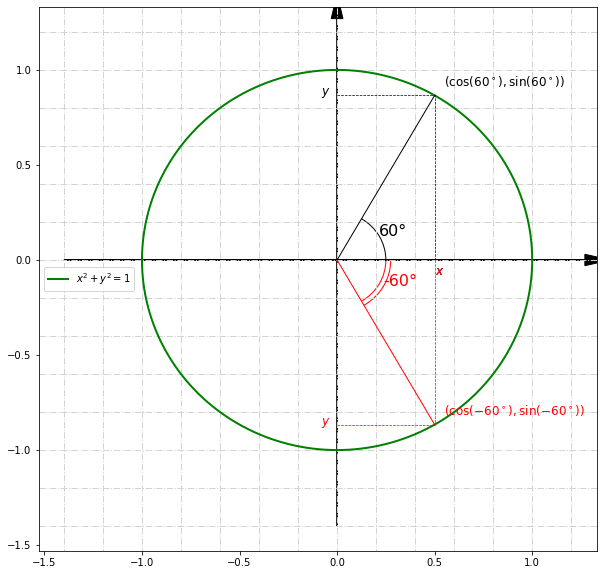

In [9]:

k = 1.4
ymin, ymax = -k, k
xticks = np.arange(-k, k, 0.2)
yticks = np.arange(-k, k, 0.2)

fig = plt.figure(figsize=(10, 10))
ax = fig.gca()

for xt in xticks:
    ax.axvline(x=xt, ymin=ymin, ymax=ymax, lw=1, ls='-.' if xt != 0 else '-', color='k'  if xt == 0 else 'lightgrey')

for yt in yticks:
    ax.axhline(y=yt, lw=1, ls='-.' if yt != 0 else '-', color='k' if yt == 0 else 'lightgrey')

ax.arrow(-k, 0, 2*k, 0, lw=1, head_width=0.06, head_length=0.13, length_includes_head=True, fc='k', ec='k')
ax.arrow(0, -k, 0, 2*k, lw=1, head_width=0.06, head_length=0.13, length_includes_head=True, fc='k', ec='k')

ax.plot([np.sin(t) for t in np.linspace(0,2*np.pi, 1000)], \
        [np.cos(t) for t in np.linspace(0,2*np.pi, 1000)], \
        c='g', lw=2, label=f"$ x^2+y^2=1 $")

add_angle(ax=ax, angle=60, offset =[0.5], up_angle_annot=True, color='k')
add_angle(ax=ax, angle=-60, offset=[0.5, 0.55], up_angle_annot=False, color='r')
# ax.add_collection(get_angle_plot(angle=60, offset=0.4))

ax.legend()
plt.savefig('./pics/unit_circle1.png')
plt.show()

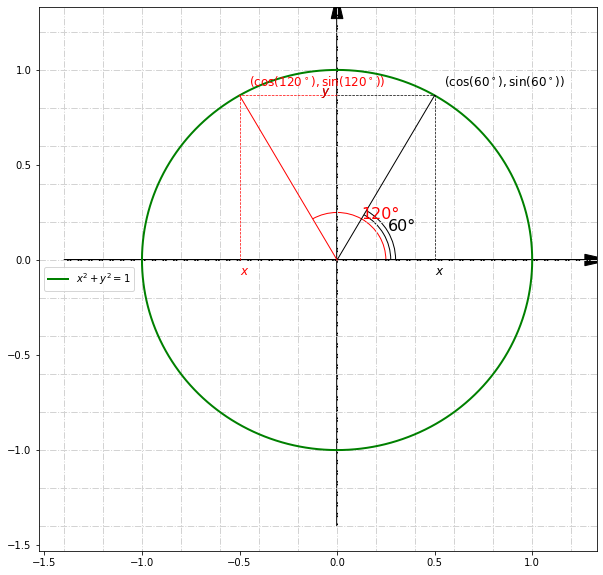

In [10]:
k = 1.4
xticks = np.arange(-k, k, 0.2)
yticks = np.arange(-k, k, 0.2)

fig = plt.figure(figsize=(10, 10))
ax = fig.gca()

for xt in xticks:
    ax.axvline(x=xt, ymin=ymin, ymax=ymax, lw=1, ls='-.' if xt != 0 else '-', color='k'  if xt == 0 else 'lightgrey')

for yt in yticks:
    ax.axhline(y=yt, lw=1, ls='-.' if yt != 0 else '-', color='k' if yt == 0 else 'lightgrey')

ax.arrow(-k, 0, 2*k, 0, lw=1, head_width=0.06, head_length=0.13, length_includes_head=True, fc='k', ec='k')
ax.arrow(0, -k, 0, 2*k, lw=1, head_width=0.06, head_length=0.13, length_includes_head=True, fc='k', ec='k')

ax.plot([np.sin(t) for t in np.linspace(0,2*np.pi, 1000)], \
        [np.cos(t) for t in np.linspace(0,2*np.pi, 1000)], \
        c='g', lw=2, label=f"$ x^2+y^2=1 $")

add_angle(ax=ax, angle=60, offset =[0.55, 0.6], up_angle_annot=True, color='k')
add_angle(ax=ax, angle=120, offset=[0.5], up_angle_annot=True, color='r')
# ax.add_collection(get_angle_plot(angle=60, offset=0.4))

ax.legend()
plt.savefig('./pics/unit_circle2.png')
plt.show()

NameError: name 'ymin' is not defined

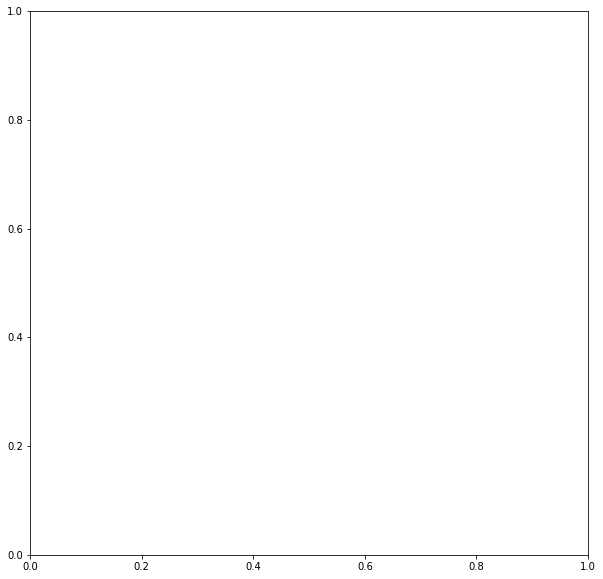

In [7]:
k = 1.4
xticks = np.arange(-k, k, 0.2)
yticks = np.arange(-k, k, 0.2)

fig = plt.figure(figsize=(10, 10))
ax = fig.gca()

for xt in xticks:
    ax.axvline(x=xt, ymin=ymin, ymax=ymax, lw=1, ls='-.' if xt != 0 else '-', color='k'  if xt == 0 else 'lightgrey')

for yt in yticks:
    ax.axhline(y=yt, lw=1, ls='-.' if yt != 0 else '-', color='k' if yt == 0 else 'lightgrey')

ax.arrow(-k, 0, 2*k, 0, lw=1, head_width=0.06, head_length=0.13, length_includes_head=True, fc='k', ec='k')
ax.arrow(0, -k, 0, 2*k, lw=1, head_width=0.06, head_length=0.13, length_includes_head=True, fc='k', ec='k')

ax.plot([np.sin(t) for t in np.linspace(0,2*np.pi, 1000)], \
        [np.cos(t) for t in np.linspace(0,2*np.pi, 1000)], \
        c='g', lw=2, label=f"$ x^2+y^2=1 $")

add_angle(ax=ax, angle=60, offset =[0.55, 0.6], up_angle_annot=True, color='k')
add_angle(ax=ax, angle=240, offset=[0.5], up_angle_annot=True, color='r')
# ax.add_collection(get_angle_plot(angle=60, offset=0.4))

ax.legend()
plt.savefig('./pics/unit_circle3.png')
plt.show()

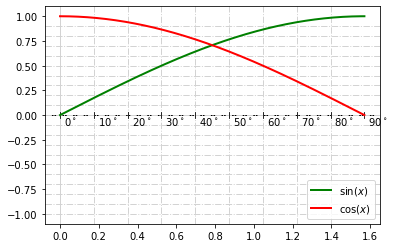

In [21]:
xmin, xmax = -np.pi/2, 3*np.pi/2
xmin, xmax = 0, np.pi/2
x = np.linspace(xmin, xmax, 1000)
y = np.sin(x)
ymin, ymax = np.min(y), np.max(y)

fig = plt.figure(figsize=(6, 4))
ax = fig.gca()

ax.axvline(x=0, ymin=ymin, ymax=ymax, lw=1, color='k')
ax.axhline(y=0, xmin=xmin, xmax=xmax, lw=1, color='k')

for xt in np.arange(0, np.pi/2, np.pi/18):
    ax.axvline(x=xt, ymin=ymin, ymax=ymax, lw=1, ls='-.' if xt != 0 else '-', color= 'lightgrey')

for yt in np.arange(-1, 1, 0.1):
    ax.axhline(y=yt, lw=1, ls='-.' if yt != 0 else '-', color= 'lightgrey')

for t,l in zip(np.arange(0, np.pi/2+np.pi/18, np.pi/18),
[f'${a}^\circ$' for a in np.arange(0, 100, 10)]):
    ax.plot([t,t],[-0.03,0.03], c='k', lw=0.8)
    ax.text(t+0.02, -0.1,s=l)

ax.plot(x, np.sin(x), c='g', label='$\sin(x)$', lw=2)
ax.plot(x, np.cos(x), c='r', label='$\cos(x)$', lw=2)
ax.legend()
plt.savefig('./pics/sin_cos_1.png')
plt.show()

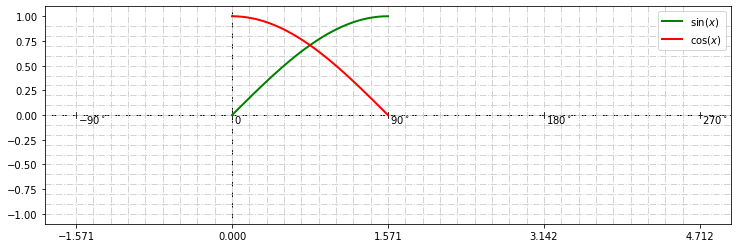

In [8]:
xmin, xmax = -np.pi/2, 3*np.pi/2
xmin, xmax = 0, np.pi/2
x = np.linspace(xmin, xmax, 1000)
y = np.sin(x)
ymin, ymax = np.min(y), np.max(y)

fig = plt.figure(figsize=(12.3, 4))
ax = fig.gca()

ax.axvline(x=0, ymin=ymin, ymax=ymax, lw=1, color='k')
ax.axhline(y=0, xmin=xmin, xmax=xmax, lw=1, color='k')

for xt in np.arange(-np.pi/2, 3*np.pi/2, np.pi/18):
    ax.axvline(x=xt, ymin=ymin, ymax=ymax, lw=1, ls='-.' if xt != 0 else '-', color= 'lightgrey')

for yt in np.arange(-1, 1, 0.1):
    ax.axhline(y=yt, lw=1, ls='-.' if yt != 0 else '-', color= 'lightgrey')


# plt.xticks(ticks=[0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], labels=['0',r'$\frac{\pi}{2}$', '$\pi$',r'$\frac{3\pi}{2}$', '$2\pi$'])# , labels=['$-90^\circ$', '0','$90^\circ$','$180^\circ$', '$270^\circ$']
ax.set_xticks(ticks=[-np.pi/2, 0, np.pi/2, np.pi, 3*np.pi/2])
for t,l in zip([-np.pi/2, 0, np.pi/2, np.pi, 3*np.pi/2],
['$-90^\circ$', '0','$90^\circ$','$180^\circ$', '$270^\circ$']):
    ax.plot([t,t],[-0.03,0.03], c='k', lw=0.8)
    ax.text(t+0.02, -0.08,s=l)

ax.plot(x, np.sin(x), c='g', label='$\sin(x)$', lw=2)
ax.plot(x, np.cos(x), c='r', label='$\cos(x)$', lw=2)
ax.legend()
plt.savefig('./pics/sin_cos_2.png')
plt.show()

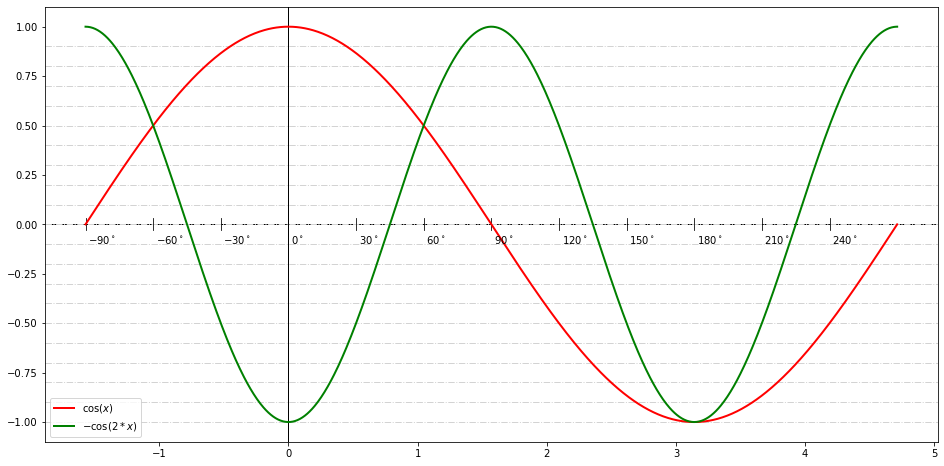

In [16]:
xmin, xmax = -np.pi/2, 3*np.pi/2
# xmin, xmax = 0, np.pi/2
x = np.linspace(xmin, xmax, 1000)
y = np.sin(x)
ymin, ymax = np.min(y), np.max(y)

fig = plt.figure(figsize=(16, 8))
ax = fig.gca()

ax.axvline(x=0, ymin=ymin, ymax=ymax, lw=1, color='k')
ax.axhline(y=0, xmin=xmin, xmax=xmax, lw=1, color='k')

for xt in np.arange(0, xmin, xmax):
    ax.axvline(x=xt, ymin=ymin, ymax=ymax, lw=1, ls='-.' if xt != 0 else '-', color= 'lightgrey')

for yt in np.arange(-1, 1, 0.1):
    ax.axhline(y=yt, lw=1, ls='-.' if yt != 0 else '-', color= 'lightgrey')

for t,l in zip(np.arange(xmin, xmax, np.pi/6),
[f'${a}^\circ$' for a in np.arange(-90, 280, 30)]):
    ax.plot([t,t],[-0.03,0.03], c='k', lw=0.8)
    ax.text(t+0.02, -0.1,s=l)

# ax.plot(x, np.sin(x), c='g', label='$\sin(x)$', lw=2)
ax.plot(x, np.cos(x), c='r', label='$\cos(x)$', lw=2)
ax.plot(x, -np.cos(2*x), c='g', label='$-\cos(2*x)$', lw=2)
ax.legend()
plt.savefig('./pics/sin_cos_1.png')
plt.show()